In [3]:
#import libaries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [4]:
web_df = pd.read_csv(r"website_success_sites - website_success_sites.csv",
                     parse_dates=["publish_date"],
                     infer_datetime_format=True,
                    )
sales_df = pd.read_csv(r"website_success_transactions.csv",
                     parse_dates=["timestamp"],
                     infer_datetime_format=True,
                      )
                            

In [5]:
web_df.head()

,guid,country,type,industry,last_device_type,last_ip,last_screen_resolution,last_browser,last_os,publish_date
0,083a9126-0230-4727-8170-1b31fd41cb3d,United States,Store,Pharmacy,Desktop,66.31.105.30,1920x1080,Chrome,Windows,2023-02-22
1,af88ed82-ccc5-432e-9a97-5ee5726baf1d,UNITED STATES,Store,Pharmacy,Laptop,151.43.91.248,1366x768,Edge,Android,2021-08-14
2,4752b53d-58e9-4b7e-9b8a-f27d3857cc2b,India,Service,Transportation,Desktop,176.191.247.97,1680x1050,Firefox,Windows,2022-11-09
3,0c6047d4-4b06-44af-bd5a-e7e15ebaa25e,United States,Store,Retail,Tablet,69.151.216.164,1680x1050,Opera,Windows,2022-12-12
4,5ce7df04-15e8-4934-a870-013c7e701557,Iran,Store,Home Improvement,Laptop,49.200.104.164,1920x1080,Edge,Android,2021-09-07


In [6]:
sales_df.head()

,site_guid,transaction_guid,customer_guid,product_name,price_usd,timestamp
0,ad5c9f3e-6845-43f7-800c-efde43be9fd5,5a831be4-7f73-402d-8498-de94375e57c5,a15ea303-a271-44a8-8811-c75e3819fd74,Seafood,22.2,2021-10-31
1,ad5c9f3e-6845-43f7-800c-efde43be9fd5,5bdd6359-2e76-4b01-b80e-b79d7f7ad675,0aa06cb1-307c-4231-94ac-8dd72c0b1628,Meat and Poultry,33.0,2021-10-08
2,ad5c9f3e-6845-43f7-800c-efde43be9fd5,2b6fdceb-d90e-4f9e-bdc1-da89f54b2b31,691541a9-a35d-47cc-97a9-c4a2483540ee,Dairy,4.6,2021-10-04
3,ad5c9f3e-6845-43f7-800c-efde43be9fd5,89ce3246-4a1d-4ce4-9928-e02ebdd4d663,748ec0b1-2f29-4124-82a8-a901f0ac85f1,Bakery,40.0,2021-10-24
4,ad5c9f3e-6845-43f7-800c-efde43be9fd5,2be0cab1-5d63-4f7b-a1cc-3c544376395d,ce1057b8-e87d-44bc-8991-375b12f95e54,Confectionery,820.2,2021-10-15


In [7]:
sales_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001486 entries, 0 to 3001485
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   site_guid         2974501 non-null  object        
 1   transaction_guid  2974501 non-null  object        
 2   customer_guid     2974501 non-null  object        
 3   product_name      2974501 non-null  object        
 4   price_usd         2974501 non-null  float64       
 5   timestamp         3001486 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 137.4+ MB


In [8]:
sales_df.shape

(3001486, 6)

In [9]:
sales_df.describe()

,price_usd
count,2.974501e+06
mean,1.467970e+03
std,1.268822e+04
min,1.000000e-01
25%,2.890000e+01
50%,1.290000e+02
75%,5.762000e+02
max,3.292789e+06


In [10]:
sales_df.isna().sum()

site_guid           26985
transaction_guid    26985
customer_guid       26985
product_name        26985
price_usd           26985
timestamp               0
dtype: int64

In [11]:
web_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21500 entries, 0 to 21499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   guid                    21500 non-null  object        
 1   country                 21481 non-null  object        
 2   type                    21483 non-null  object        
 3   industry                21476 non-null  object        
 4   last_device_type        21500 non-null  object        
 5   last_ip                 21500 non-null  object        
 6   last_screen_resolution  21500 non-null  object        
 7   last_browser            21500 non-null  object        
 8   last_os                 21500 non-null  object        
 9   publish_date            21500 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(9)
memory usage: 1.6+ MB


In [12]:
web_df.count()

guid                      21500
country                   21481
type                      21483
industry                  21476
last_device_type          21500
last_ip                   21500
last_screen_resolution    21500
last_browser              21500
last_os                   21500
publish_date              21500
dtype: int64

In [13]:
web_df.isna().sum()

guid                       0
country                   19
type                      17
industry                  24
last_device_type           0
last_ip                    0
last_screen_resolution     0
last_browser               0
last_os                    0
publish_date               0
dtype: int64

In [14]:
web_df['country'] = web_df['country'].fillna('Unknown')
web_df['type'] = web_df['type'].fillna('Unknown')
web_df['industry'] = web_df['industry'].fillna('Unknown')

# 2. Prepare & clean the Data

--- web_df ---

In [23]:
#variable type change and capitalize fix

web_df = web_df.astype({'country': 'string', 'type': 'string', 'industry': 'string'})
web_df['country'] = web_df['country'].str.lower()
web_df['country'] = web_df['country'].str.title()

In [24]:
# publish date validation

web_df['publish_date'].dt.year.unique()


array([2023, 2021, 2022, 2099], dtype=int64)

In [25]:
sales_df = sales_df.loc[sales_df['timestamp'].dt.year>2020]
sales_df['timestamp'].dt.year.unique()

array([2021, 2022, 2023], dtype=int64)

In [26]:
# df Merging

merged_df = web_df.merge(sales_df,how="left",left_on=["guid"],right_on=["site_guid"],)

In [27]:
merged_df

,guid,country,type,industry,last_device_type,last_ip,last_screen_resolution,last_browser,last_os,publish_date,site_guid,transaction_guid,customer_guid,product_name,price_usd,timestamp
0,083a9126-0230-4727-8170-1b31fd41cb3d,United States,Store,Pharmacy,Desktop,66.31.105.30,1920x1080,Chrome,Windows,2023-02-22,NaN,NaN,NaN,NaN,NaN,NaT
1,af88ed82-ccc5-432e-9a97-5ee5726baf1d,United States,Store,Pharmacy,Laptop,151.43.91.248,1366x768,Edge,Android,2021-08-14,af88ed82-ccc5-432e-9a97-5ee5726baf1d,52e6b145-2e6d-45e7-b954-4d7cfb2b41ca,ded803b6-f382-4fef-bf72-d6715e51c31c,Vitamins and Supplements,48.5,2021-09-05
2,af88ed82-ccc5-432e-9a97-5ee5726baf1d,United States,Store,Pharmacy,Laptop,151.43.91.248,1366x768,Edge,Android,2021-08-14,af88ed82-ccc5-432e-9a97-5ee5726baf1d,78bd9cbb-73ea-4ea2-bd05-130ee5f3de81,439a16a8-cd5c-416a-a77b-36797a21f315,Prescription Drugs,253.6,2021-09-20
3,af88ed82-ccc5-432e-9a97-5ee5726baf1d,United States,Store,Pharmacy,Laptop,151.43.91.248,1366x768,Edge,Android,2021-08-14,af88ed82-ccc5-432e-9a97-5ee5726baf1d,84bef0dc-67ad-49f3-bbf8-5af1fdba9774,f140789a-80a6-4f6c-a969-d860c35993fc,Medical Devices,501.1,2021-09-21
4,af88ed82-ccc5-432e-9a97-5ee5726baf1d,United States,Store,Pharmacy,Laptop,151.43.91.248,1366x768,Edge,Android,2021-08-14,af88ed82-ccc5-432e-9a97-5ee5726baf1d,a502527d-7c56-4953-aaac-f781dd752778,f213a013-affc-40f4-938f-c1bdc17a9be3,Over-the-Counter Drugs,104.7,2021-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980782,d2fd62f9-2528-45e6-b8f6-da6e7561f49e,India,Store,Sporting Goods,Desktop,172.155.12.122,1920x1080,Opera,macOS,2022-01-10,d2fd62f9-2528-45e6-b8f6-da6e7561f49e,3bce5fd1-92c8-4e18-aa06-bde18c1c80f4,953c9498-dafb-4741-8db7-ec21f1094b64,Hiking and Camping,14.8,2022-03-10
2980783,d2fd62f9-2528-45e6-b8f6-da6e7561f49e,India,Store,Sporting Goods,Desktop,172.155.12.122,1920x1080,Opera,macOS,2022-01-10,d2fd62f9-2528-45e6-b8f6-da6e7561f49e,aeae698d-7b41-41e6-ba90-02597710172d,d1bd741f-3a6c-43fe-a0d2-4a5f9985ce32,Athletic Footwear,269.5,2022-03-10
2980784,d2fd62f9-2528-45e6-b8f6-da6e7561f49e,India,Store,Sporting Goods,Desktop,172.155.12.122,1920x1080,Opera,macOS,2022-01-10,d2fd62f9-2528-45e6-b8f6-da6e7561f49e,8ff001f8-de10-48bf-81c9-8129782ae508,1e66e7ae-ceef-41c6-9d9a-db26fa15bf80,Outdoor Recreation,48.1,2022-03-01
2980785,d2fd62f9-2528-45e6-b8f6-da6e7561f49e,India,Store,Sporting Goods,Desktop,172.155.12.122,1920x1080,Opera,macOS,2022-01-10,d2fd62f9-2528-45e6-b8f6-da6e7561f49e,eb6e550f-9f61-41c1-a4ec-5d6a5329909e,ef992985-1fc7-41d1-8e6a-4b7c097f0d5a,Fitness Apparel,6.6,2022-03-16


In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2980787 entries, 0 to 2980786
Data columns (total 16 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   guid                    object        
 1   country                 string        
 2   type                    string        
 3   industry                string        
 4   last_device_type        object        
 5   last_ip                 object        
 6   last_screen_resolution  object        
 7   last_browser            object        
 8   last_os                 object        
 9   publish_date            datetime64[ns]
 10  site_guid               object        
 11  transaction_guid        object        
 12  customer_guid           object        
 13  product_name            object        
 14  price_usd               float64       
 15  timestamp               datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(10), string(3)
memory usage: 386.6+ MB


In [29]:
merged_df.drop(['site_guid','last_browser','last_device_type','last_ip','last_screen_resolution','last_os'],axis=1,inplace=True)

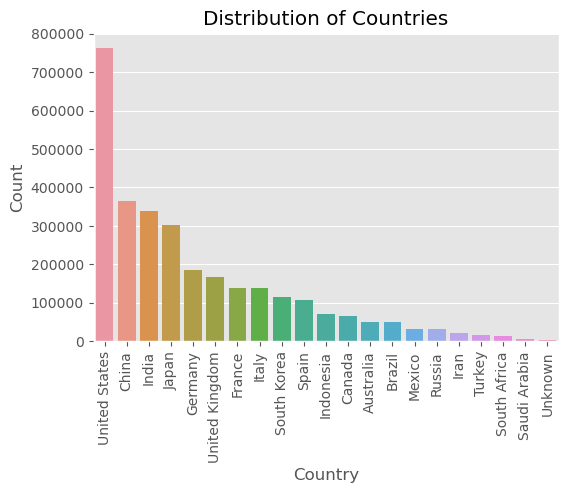

In [46]:
# Bar plot of country distribution
country_counts = merged_df['country'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Countries')
plt.xticks(rotation=90)
plt.show()


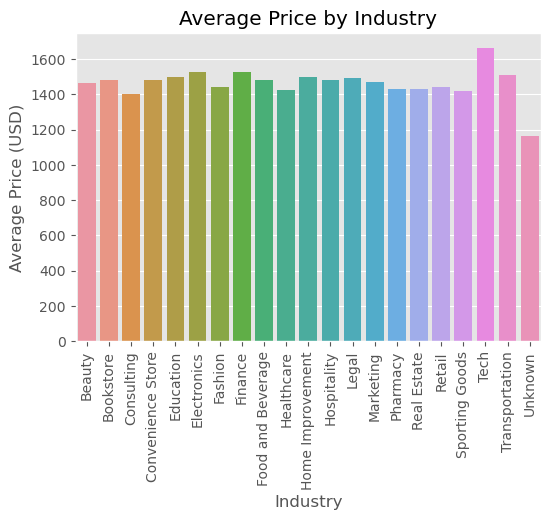

In [45]:
# Grouping data by industry and calculating average price
avg_price_by_industry = merged_df.groupby('industry')['price_usd'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_price_by_industry.index, y=avg_price_by_industry.values)
plt.xlabel('Industry')
plt.ylabel('Average Price (USD)')
plt.title('Average Price by Industry')
plt.xticks(rotation=90)
plt.show()


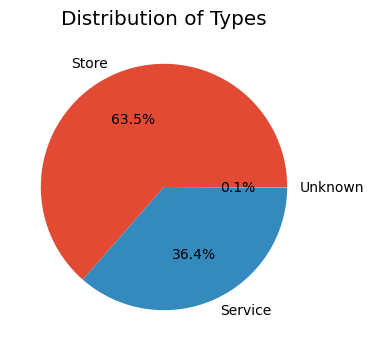

In [43]:
# Pie chart of type distribution with smaller size and aspect ratio
type_counts = merged_df['type'].value_counts()
plt.figure(figsize=(6, 4))  # Decrease the figure size here
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Types')
plt.gca().set_aspect('equal')  # Set aspect ratio to make it more circular
plt.show()


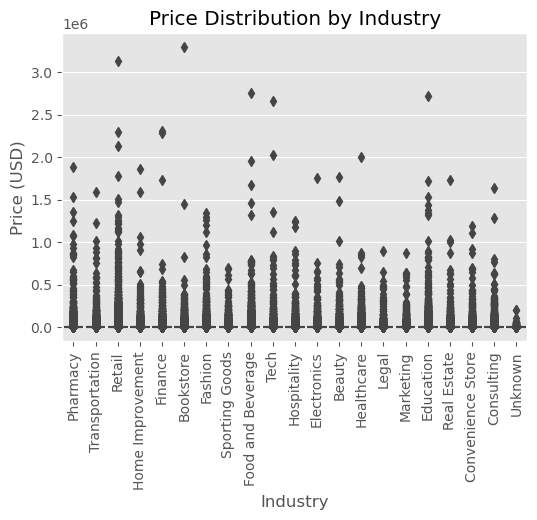

In [44]:
# Box plot of price by industry
plt.figure(figsize=(6, 4))
sns.boxplot(x=merged_df['industry'], y=merged_df['price_usd'])
plt.xlabel('Industry')
plt.ylabel('Price (USD)')
plt.title('Price Distribution by Industry')
plt.xticks(rotation=90)
plt.show()
